## Batch effect visualization

0it [00:00, ?it/s]

18:02:41 | DEBUG | Filtering TENX68


100%|██████████| 1/1 [00:03<00:00,  3.58s/it]
1it [00:05,  5.55s/it]

18:02:46 | DEBUG | Filtering TENX53


100%|██████████| 1/1 [00:00<00:00,  1.89it/s]
2it [00:18,  9.89s/it]

18:02:59 | DEBUG | Filtering TENX39


100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
3it [00:21,  6.62s/it]

18:03:02 | DEBUG | Filtering TENX14


100%|██████████| 1/1 [00:00<00:00,  1.86it/s]
4it [00:27,  6.29s/it]

18:03:08 | DEBUG | Filtering TENX13


100%|██████████| 1/1 [00:00<00:00,  1.18it/s]
5it [00:31,  5.50s/it]

18:03:12 | DEBUG | Filtering NCBI776


100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
6it [00:35,  5.27s/it]

18:03:17 | DEBUG | Filtering NCBI684


100%|██████████| 1/1 [00:00<00:00,  1.60it/s]
7it [00:43,  6.05s/it]

18:03:24 | DEBUG | Filtering NCBI683


100%|██████████| 1/1 [00:00<00:00,  1.34it/s]
8it [00:51,  6.57s/it]

18:03:32 | DEBUG | Filtering NCBI682


100%|██████████| 1/1 [00:00<00:00,  1.08it/s]
9it [01:00,  7.34s/it]

18:03:41 | DEBUG | Filtering NCBI681


100%|██████████| 1/1 [00:01<00:00,  1.12s/it]
10it [01:09,  6.93s/it]
/home/fedshyvana/anaconda3/envs/cuml/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Silhouette score is -0.13047750294208527


/home/fedshyvana/anaconda3/envs/cuml/lib/python3.9/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/home/fedshyvana/anaconda3/envs/cuml/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/fedshyvana/anaconda3/envs/cuml/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


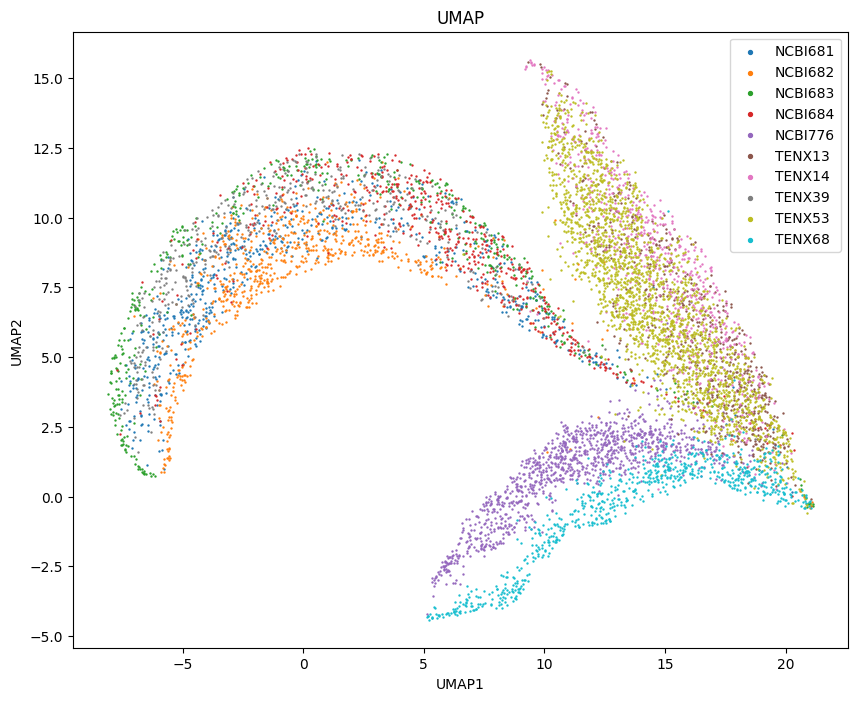

In [1]:
import pandas as pd
from hest.batch_effect import filter_hest_stromal_housekeeping, get_silhouette_score, plot_umap

meta_df = pd.read_csv('../hest_data/HEST_v1_0_2.csv')

meta_df = meta_df[
    (meta_df['st_technology'] == 'Visium') & 
    (meta_df['disease_state'] == 'Cancer') & 
    (meta_df['oncotree_code'] == 'IDC') & 
    (meta_df['species'] == 'Homo sapiens')
]

# We filter spots, such that:
# - we only keep the most stable housekeeping genes (based on https://housekeeping.unicamp.br/?download)
# - we only keep the spots under the stroma (based on CellViT segmentation)
adata_list = filter_hest_stromal_housekeeping(meta_df, hest_dir='../hest_data')

labels = meta_df['id'].values
score = get_silhouette_score(adata_list, labels=labels)
# (-1: strong overlap between clusters, can be indicative of a small batch effect, 1: poor overlap between clusters, can be indicative of a strong batch effect)
print(f'Silhouette score is {score}')


plot_umap(adata_list, labels, 'batch_whole_tissue.png', umap_kwargs={'min_dist': 0.6})